In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.circuit.library import C3XGate
from qiskit import execute

from math import pi

The state this is now present in is $\newline$
1 0 0 $\newline$1 ? ? $\newline$0 ? ? $\newline$
Here, ? represents an unknown state/a cell that hasn't been filled yet.
$\newline$
The corresponding numbering in the qubits is given below. $\newline$
7 6 8 $\newline$5 3 2 $\newline$4 1 0 $\newline$

Clearly, the possible winning cases for X in this exercise are the following.

X O O $\newline$
X X X $\newline$
O _ O $\newline$ 
and $\newline$
X O O $\newline$
X X O $\newline$
O _ X $\newline$

The underscore's value doesn't matter but let us take them as O to conveniently respresent the final output states. We thus get the output states for the above 2 solutions as |1100> and |1001> respectively

In [2]:
#The following functions are all part of the Grover's algorithm for amplitude amplification

#This function adds a negative phase to the state 1100

def add_phase_1100(qc): 
    qc.x([0, 1])
    qc.h(3)
    qc.append(C3XGate(), [0, 1, 2, 3])
    qc.x([0, 1])
    qc.h(3)
    qc.barrier()

#This function adds a negative phase to the state 1001
def add_phase_1001(qc):
    qc.x([1, 2])
    qc.h(3)
    qc.append(C3XGate(), [0, 1, 2, 3])
    qc.x([1, 2])
    qc.h(3)
    qc.barrier()

#This function is supposed to be the ( 2|s><s| - I ) operator in the Grover's alg. Since this operator essentially is a reflection operator,
#and is the second reflection operator that is being performed, the function has been named this way.

def second_reflection(qc):
    qc.h([0, 1, 2, 3])
    qc.x([0, 1, 2, 3])
    qc.h(3)
    qc.append(C3XGate(), [0, 1, 2, 3])
    qc.h(3)
    qc.x([0, 1, 2, 3])
    qc.h([0, 1, 2, 3])
    qc.barrier()

In [3]:
qc = QuantumCircuit(9, 9)
qc.x([7, 5])
qc.h([3,2,1,0])
qc.barrier()
qc.draw()

┌───┐ ░ 
q_0: ┤ H ├─░─
     ├───┤ ░ 
q_1: ┤ H ├─░─
     ├───┤ ░ 
q_2: ┤ H ├─░─
     ├───┤ ░ 
q_3: ┤ H ├─░─
     └───┘ ░ 
q_4: ──────░─
     ┌───┐ ░ 
q_5: ┤ X ├─░─
     └───┘ ░ 
q_6: ──────░─
     ┌───┐ ░ 
q_7: ┤ X ├─░─
     └───┘ ░ 
q_8: ──────░─
           ░ 
c: 9/════════

In [4]:
#This is the amplitude amplification part
add_phase_1100(qc)
add_phase_1001(qc)
second_reflection(qc)

The same set of operations need to be performed one more time to increase the amplitude of the correct output states so as to increaes the corresponding probability. But how do we know that we need to do this 2 times (totally) and not some other number? $\newline$
It is 2 and not more because in this case, we're working with 4 qubits (16 different possibilities of wrt measurement) and 2 solutions. So we need to run 2 iterations to maximize the probability.

In [5]:
add_phase_1100(qc)
add_phase_1001(qc)
second_reflection(qc)
qc.draw()

┌───┐ ░ ┌───┐     ┌───┐ ░                 ░ ┌───┐┌───┐          ┌───┐┌───┐»
q_0: ┤ H ├─░─┤ X ├──■──┤ X ├─░────────■────────░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├»
     ├───┤ ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░ ├───┤├───┤       │  ├───┤├───┤»
q_1: ┤ H ├─░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├»
     ├───┤ ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░ ├───┤├───┤       │  ├───┤├───┤»
q_2: ┤ H ├─░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├┤ H ├»
     ├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤├───┤»
q_3: ┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├┤ X ├»
     └───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘└───┘»
q_4: ──────░─────────────────░─────────────────░───────────────────────────────»
     ┌───┐ ░                 ░                 ░                               »
q_5: ┤ X ├─░─────────────────░─────────────────░───────────────────────────────»
     └───┘ ░                 ░                 ░                               »
q_6: ──────░─────────────────░─────────────────░───────────────────────────────»
     ┌───┐ ░                 ░                 ░                               »
q_7: ┤ X ├─░─────────────────░─────────────────░───────────────────────────────»
     └───┘ ░                 ░                 ░                               »
q_8: ──────░─────────────────░─────────────────░───────────────────────────────»
           ░                 ░                 ░                               »
c: 9/══════════════════════════════════════════════════════════════════════════»
                                                                               »
«           ░ ┌───┐     ┌───┐ ░                 ░ ┌───┐┌───┐          ┌───┐»
«q_0: ──────░─┤ X ├──■──┤ X ├─░────────■────────░─┤ H ├┤ X ├───────■──┤ X ├»
«           ░ ├───┤  │  ├───┤ ░ ┌───┐  │  ┌───┐ ░ ├───┤├───┤       │  ├───┤»
«q_1: ──────░─┤ X ├──■──┤ X ├─░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├»
«           ░ └───┘  │  └───┘ ░ ├───┤  │  ├───┤ ░ ├───┤├───┤       │  ├───┤»
«q_2: ──────░────────■────────░─┤ X ├──■──┤ X ├─░─┤ H ├┤ X ├───────■──┤ X ├»
«     ┌───┐ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤┌─┴─┐├───┤ ░ ├───┤├───┤┌───┐┌─┴─┐├───┤»
«q_3: ┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├─░─┤ H ├┤ X ├┤ H ├┤ X ├┤ H ├»
«     └───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘└───┘└───┘└───┘»
«q_4: ──────░─────────────────░─────────────────░──────────────────────────»
«           ░                 ░                 ░                          »
«q_5: ──────░─────────────────░─────────────────░──────────────────────────»
«           ░                 ░                 ░                          »
«q_6: ──────░─────────────────░─────────────────░──────────────────────────»
«           ░                 ░                 ░                          »
«q_7: ──────░─────────────────░─────────────────░──────────────────────────»
«           ░                 ░                 ░                          »
«q_8: ──────░─────────────────░─────────────────░──────────────────────────»
«           ░                 ░                 ░                          »
«c: 9/═════════════════════════════════════════════════════════════════════»
«                                                                          »
«     ┌───┐      ░ 
«q_0: ┤ H ├──────░─
«     ├───┤      ░ 
«q_1: ┤ H ├──────░─
«     ├───┤      ░ 
«q_2: ┤ H ├──────░─
«     ├───┤┌───┐ ░ 
«q_3: ┤ X ├┤ H ├─░─
«     └───┘└───┘ ░ 
«q_4: ───────────░─
«                ░ 
«q_5: ───────────░─
«                ░ 
«q_6: ───────────░─
«                ░ 
«q_7: ───────────░─
«                ░ 
«q_8: ───────────░─
«                ░ 
«c: 9/═════════════
«

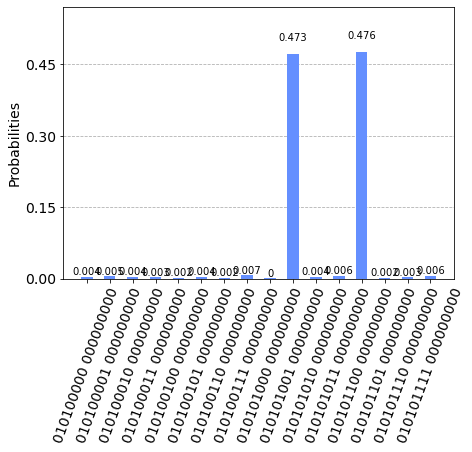

In [6]:
sim = Aer.get_backend("aer_simulator")
qc.measure_all()
job = execute(qc, sim, shots = 1024)
counts = job.result().get_counts()
plot_histogram(counts)